In [ ]:
import pandas as pd
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

1.1 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [ ]:
uploaded = files.upload()
df = pd.read_csv("walmart_data.csv")
df.head()

Saving walmart_data.csv to walmart_data.csv


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Observations : There are 10 columns and 550068 data points. The columns, User_ID, Age,Marital Status, Product category and purchase are integer data type, rest all are object data type. There are no null cells in this dataset.


In [ ]:
df["User_ID"].count()

np.int64(550068)

1.2 Non-Graphical Analysis: Value counts and unique attributes ​

In [ ]:
df["Product_ID"].value_counts().head(10)

,count
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
P00184942,1440
P00046742,1438
P00058042,1422
P00059442,1406


In [ ]:
gender_cnt=df.groupby("Gender")["User_ID"].nunique()
gen_cnt = round(gender_cnt / gender_cnt.sum(),2)*100
gen_cnt

,User_ID
Gender,
F,28.0
M,72.0


In [ ]:
age_cnt=df.groupby("Age")["User_ID"].nunique()
age_cnt = round(age_cnt / age_cnt.sum(),2)*100
age_cnt.sort_values(ascending=False)

,User_ID
Age,
26-35,35.0
36-45,20.0
18-25,18.0
46-50,9.0
51-55,8.0
55+,6.0
0-17,4.0


In [ ]:
occ_cnt=df.groupby("Occupation")["User_ID"].nunique()
occ_cnt = round(occ_cnt / occ_cnt.sum(),2)*100
occ_cnt.sort_values(ascending=False).head(6)

,User_ID
Occupation,
4,13.0
0,12.0
7,11.0
1,9.0
17,8.0
12,6.0


In [ ]:
city_cnt=df.groupby("City_Category")["User_ID"].nunique()
city_cnt = round(city_cnt / city_cnt.sum(),2)*100
city_cnt.sort_values(ascending=False)

,User_ID
City_Category,
C,53.0
B,29.0
A,18.0


In [ ]:
stay_cnt=df.groupby("Stay_In_Current_City_Years")["User_ID"].nunique()
stay_cnt = round(stay_cnt / stay_cnt.sum(),2)*100
stay_cnt.sort_values(ascending=False)

,User_ID
Stay_In_Current_City_Years,
1,35.0
2,19.0
3,17.0
4+,15.0
0,13.0


In [ ]:
ms_cnt=df.groupby("Marital_Status")["User_ID"].nunique()
ms_cnt = round(ms_cnt / ms_cnt.sum(),2)*100
ms_cnt.sort_values(ascending=False)

,User_ID
Marital_Status,
0,58.0
1,42.0


1.3 Visual Analysis - Univariate & Bivariate
For continuous variable(s): Distplot, countplot, histogram for univariate analysis
For categorical variable(s): Boxplot
For correlation: Heatmaps, Pairplots

Text(0.5, 0, 'Count by Marital Status')

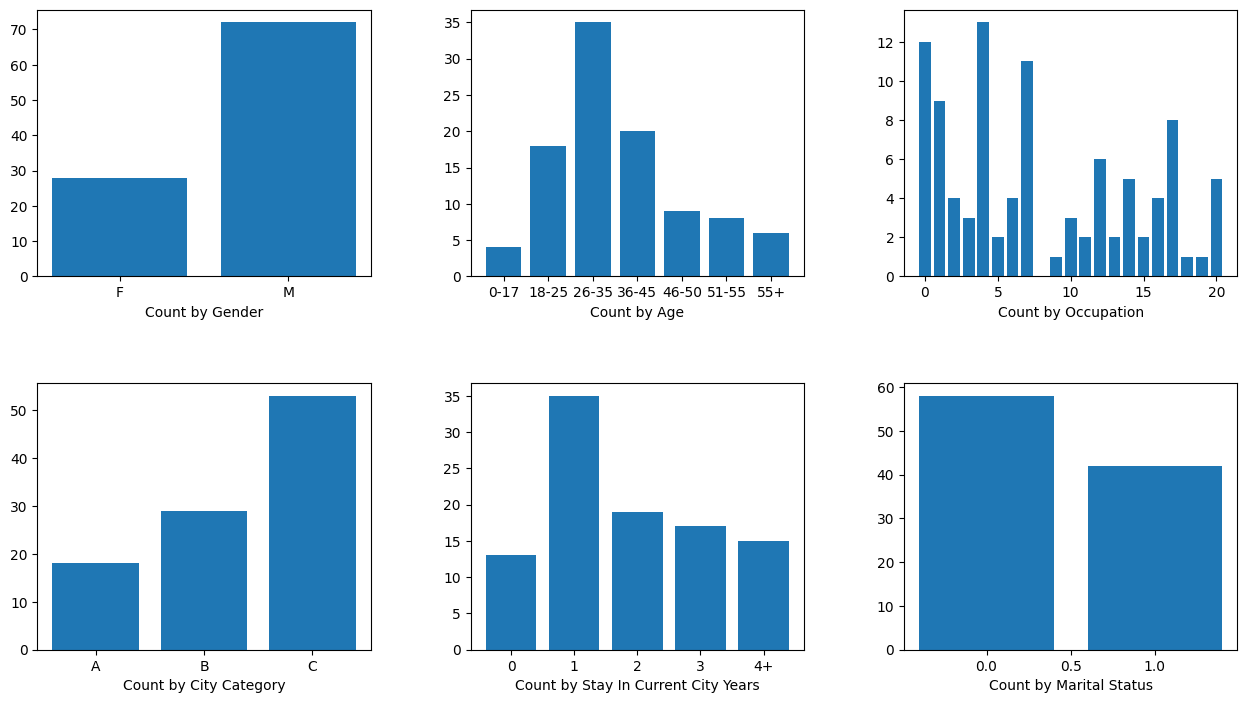

In [ ]:
plt.figure(figsize=(15,8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,
wspace=0.3, hspace=0.4)
plt.subplot(2,3,1)
plt.bar(gen_cnt.index,gen_cnt.values)
plt.xlabel("Count by Gender")
plt.subplot(2,3,2)
plt.bar(age_cnt.index,age_cnt.values)
plt.xlabel("Count by Age")
plt.subplot(2,3,3)
plt.bar(occ_cnt.index,occ_cnt.values)
plt.xlabel("Count by Occupation")
plt.subplot(2,3,4)
plt.bar(city_cnt.index,city_cnt.values)
plt.xlabel("Count by City Category")
plt.subplot(2,3,5)
plt.bar(stay_cnt.index,stay_cnt.values)
plt.xlabel("Count by Stay In Current City Years")
plt.subplot(2,3,6)
plt.bar(ms_cnt.index,ms_cnt.values)
plt.xlabel("Count by Marital Status")

Observations :

1.   Highesting selling product id is P00265242 with 1880 items sold
2.   72% of all purchases are done my Male
3.   Most of the purchases are done by 26-35 years of age group with 35
% of total purchases.
4.  Highest occupation category is 4 with 13% fo total
5.  Most of the customer is from city category C with 53% of customers.
6.  Most of the customers are reloacted to a new city within last year and they are 35% of total customers
7.  Marital status is close with 58% customers are not married  

------------------------------------------------------------------------------------------------

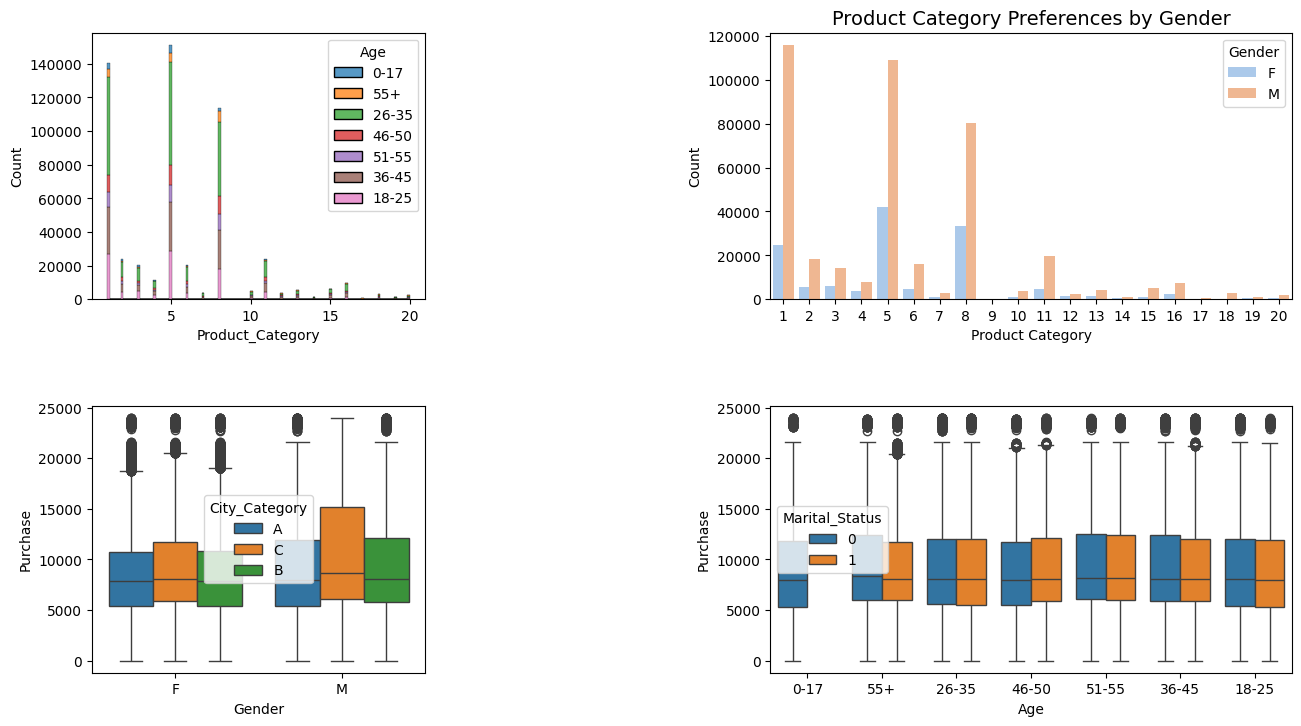

In [ ]:
plt.figure(figsize=(15,8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,
wspace=0.3, hspace=0.4)
plt.subplot(2,3,1)
sns.histplot(data=df,
             x="Product_Category",
             hue="Age",
             multiple="stack",
             shrink=1)
plt.subplot(2,2,2)
sns.countplot(data=df, x="Product_Category", hue="Gender", palette="pastel")
plt.title("Product Category Preferences by Gender", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.subplot(2,3,4)
sns.boxplot(data=df,y="Purchase",x="Gender",hue="City_Category")
plt.subplot(2,2,4)
sns.boxplot(data=df,x="Age",y="Purchase",hue="Marital_Status")
plt.show()

Observation :

1.   Most popular product category are 1,5 and 8, with age group of 26 to 35 years old
2.   Overall male have purchased more where product category 1,5 and 8 have biggest margin
3.   City C and gender male are leading in purchasing
4.   purchase median are pretty close among all age groups and marital status



<Axes: >

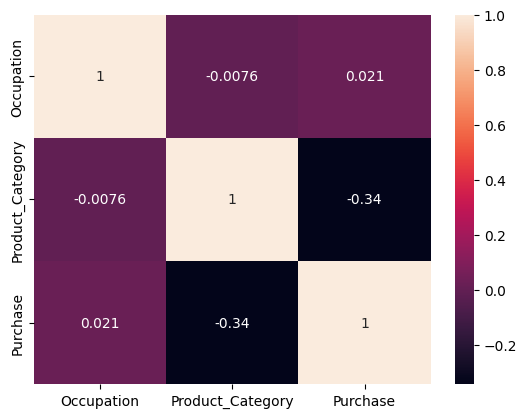

In [ ]:
 df2=df[["Occupation","Product_Category","Purchase"]]
 sns.heatmap(df2.corr(),annot=True)

------------------------------------------------------------------------------------------------


2. Missing Value & Outlier Detection

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


Text(0, 0.5, '')

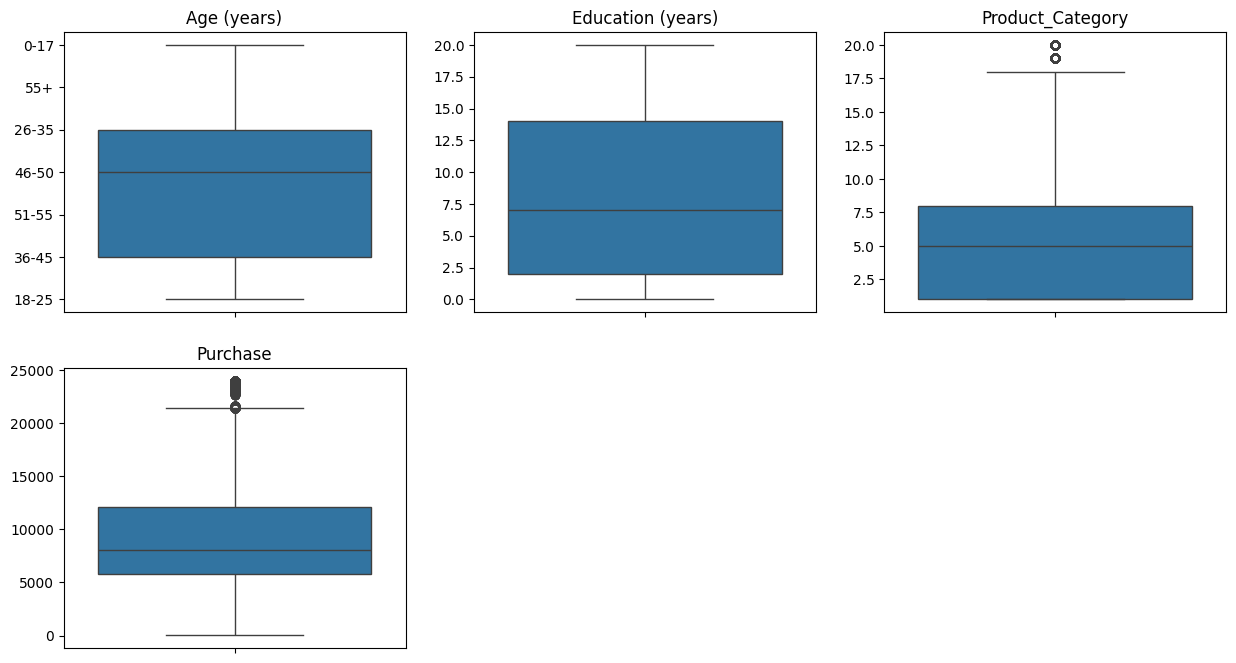

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.boxplot(data=df,y="Age")
plt.title("Age (years)")
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,2)
sns.boxplot(data=df,y="Occupation")
plt.title("Education (years)")
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,3)
sns.boxplot(data=df,y="Product_Category")
plt.title("Product_Category")
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,4)
sns.boxplot(data=df,y="Purchase")
plt.title("Purchase")
plt.xlabel("")
plt.ylabel("")


In [ ]:
df1 = df.copy()
for col in ["Product_Category","Purchase"]:
  lower = np.percentile(df1[col],5)
  upper = np.percentile(df1[col],95)
  df1[col]=np.clip(df1[col],lower,upper)

Text(0, 0.5, '')

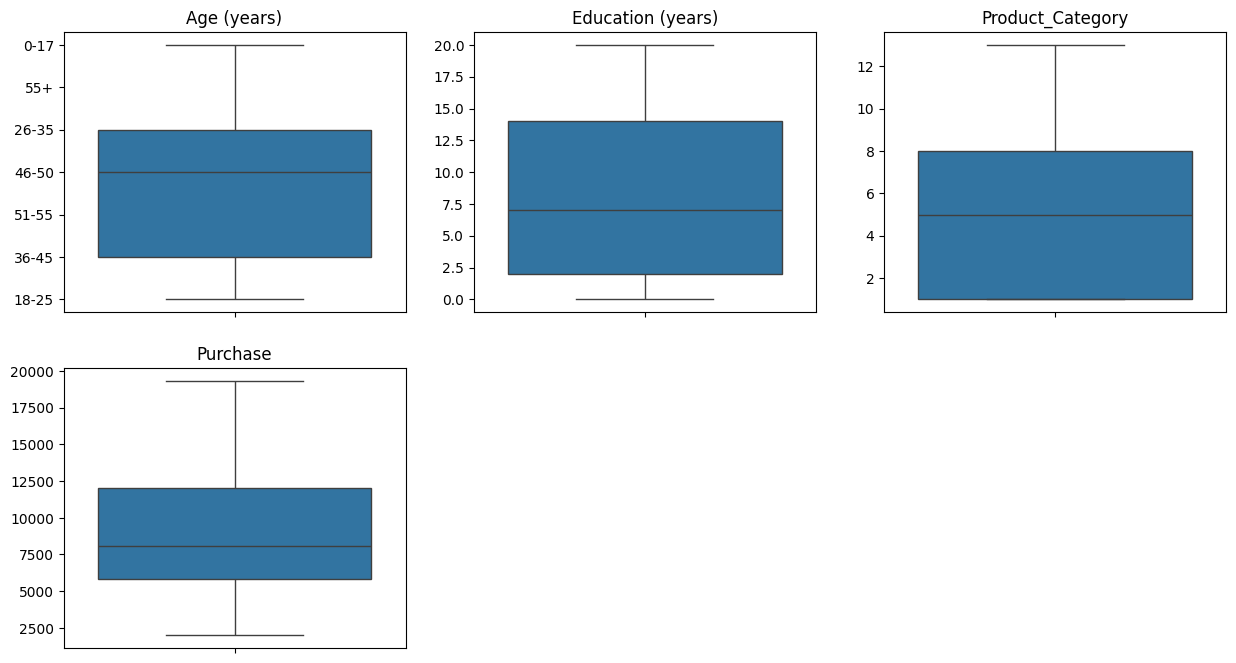

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.boxplot(data=df1,y="Age")
plt.title("Age (years)")
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,2)
sns.boxplot(data=df1,y="Occupation")
plt.title("Education (years)")
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,3)
sns.boxplot(data=df1,y="Product_Category")
plt.title("Product_Category")
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,4)
sns.boxplot(data=df1,y="Purchase")
plt.title("Purchase")
plt.xlabel("")
plt.ylabel("")

3. Business Insights based on Non- Graphical and Visual Analysis,
Comments on the range of attributes,
Comments on the distribution of the variables and relationship between them,
Comments for each univariate and bivariate plot

 Comments on Distribution and Relationship
A. Univariate Distribution (Boxplots)
The boxplots (after outlier treatment via clipping at the 5th and 95th percentiles) provide a normalized view of the central tendency.


Purchase: The distribution is highly concentrated, with a median around 8047. The box is wide, indicating that

50% of purchases (IQR) range from ≈5823 to ≈12054. After clipping, the box is centered slightly higher, with a clear median and tight IQR.





Product_Category: The distribution is skewed towards lower category numbers. The median is

5, and 50% of purchases fall between categories 1 and 8 (IQR). Clipping removes categories outside this range.





Occupation: Occupations are quite spread out, with a median of 7 and an IQR of 2 to 14.

 Correlation (Heatmap)
The correlation heatmap summarizes linear relationships between numerical attributes: Occupation, Product_Category, and Purchase.



Product_Category vs. Purchase (Strongest Relationship): There is a moderate negative correlation (−0.34). This means that as the product category number increases, the purchase amount tends to decrease. High-value purchases are more frequent in low-numbered product categories (e.g., Category 1, 5, 8).


Occupation vs. Purchase: There is a very weak positive correlation (0.021). Occupation has negligible linear impact on the Purchase amount.


Occupation vs. Product_Category: There is a very weak negative correlation (−0.0076).

Are women spending more money per transaction than men? Why or Why not?

Confidence intervals and distribution of the mean of the expenses by female and male customers

Are confidence intervals of average male and female spending overlapping?

How can Walmart leverage this conclusion to make changes or improvements?


In [ ]:
df1[df1["Gender"]=="M"]["Purchase"].mean(),df1[df1["Gender"]=="F"]["Purchase"].mean()

(np.float64(9427.240996574606), np.float64(8736.540266109021))

Observation : Women are not spending more money than men per transaction. Men are spending on an average 9427 whereas women are spending 8736 per purchase.


------------------------------------------------------------------------------------------------


In [ ]:
print("Confidence intervals of the mean of the expenses by Male",norm.interval(0.95,loc=mean_male,scale=std_male/np.sqrt(n)))

Confidence intervals of the mean of the expenses by Male (np.float64(9412.240611016145), np.float64(9442.241382133068))


In [ ]:
mean_male=df1[df1["Gender"]=="M"]["Purchase"].mean()
std_male=df1[df1["Gender"]=="M"]["Purchase"].std()
n = len(df1[df1["Gender"]=="M"]["Purchase"])

In [ ]:
mean_female=df1[df1["Gender"]=="F"]["Purchase"].mean()
std_female=df1[df1["Gender"]=="F"]["Purchase"].std()
nf = len(df1[df1["Gender"]=="F"]["Purchase"])
print("Confidence intervals of the mean of the expenses by Female",norm.interval(0.95,loc=mean_female,scale=std_female/np.sqrt(nf)))

Confidence intervals of the mean of the expenses by Female (np.float64(8712.091504525708), np.float64(8760.989027692334))


Are the confidence intervals overlapping?

Female CI: (8712, 8760)

Male CI: (9412, 9442)
→ ❌ No overlap

That means the difference in average spending between male and female customers is statistically significant at the 95% confidence level.


/tmp/ipython-input-95286576.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(female, label='Female', shade=True)
/tmp/ipython-input-95286576.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(male, label='Male', shade=True)


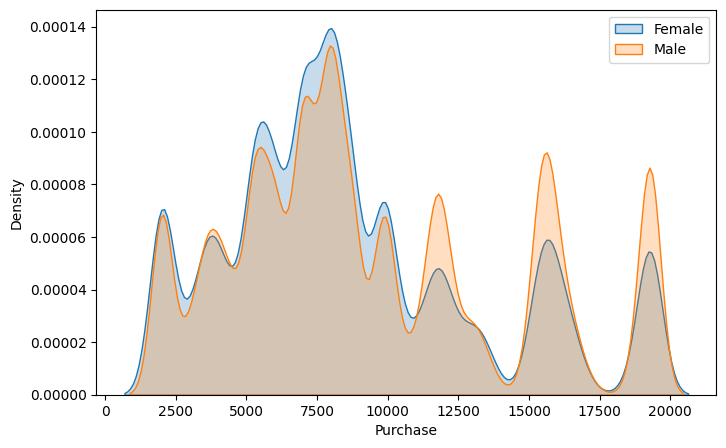

In [ ]:
female = df1[df1['Gender'] == 'F']['Purchase']
male = df1[df1['Gender'] == 'M']['Purchase']
plt.figure(figsize=(8,5))
sns.kdeplot(female, label='Female', shade=True)
sns.kdeplot(male, label='Male', shade=True)
plt.legend()

------------------------------------------------------------------------------------------------

Observations:

Both distributions are multi-peaked → indicates different spending groups (maybe low, medium, high spenders).

The female curve peaks more around ₹7,000–₹9,000, while the male curve has more density around ₹15,000–₹20,000.

The overlap in the middle range (~₹5,000–₹12,000) shows both genders have similar spending patterns there, but males dominate in higher-value purchases.
From your previous analysis:

Female mean ≈ lower

Male mean ≈ higher

The KDE confirms that pattern — the male distribution is slightly shifted right (toward higher spending).

If the confidence intervals of mean purchases do not overlap, this visually matches what you see:
Male customers’ mean spending is statistically higher.

Business Insight for Walmart

Female Customers: Tend to make more frequent, smaller purchases — offer combo deals, discounts, or personalized coupons to increase cart value.

Male Customers: Tend to make fewer but higher-value purchases — promote premium or tech-related products.

Overall Strategy:

Develop targeted campaigns by gender rather than generic ads.

Use loyalty programs to increase cross-category spending among females.

Focus up-selling and high-ticket items toward male customers.

Results when the same activity is performed for Married vs Unmarried

In [ ]:
mean_unmarried=df1[df1["Marital_Status"]==0]["Purchase"].mean()
std_unmarried=df1[df1["Marital_Status"]==0]["Purchase"].std()
n = len(df1[df1["Marital_Status"]==0]["Purchase"])
mean_married=df1[df1["Marital_Status"]==1]["Purchase"].mean()
std_married=df1[df1["Marital_Status"]==1]["Purchase"].std()
nf = len(df1[df1["Marital_Status"]==1]["Purchase"])
print("Confidence intervals of the mean of the expenses by Unmarried person",norm.interval(0.95,loc=mean_unmarried,scale=std_unmarried/np.sqrt(n)))
print("Confidence intervals of the mean of the expenses by Married person",norm.interval(0.95,loc=mean_married,scale=std_married/np.sqrt(n)))

Confidence intervals of the mean of the expenses by Unmarried person (np.float64(9242.089086233358), np.float64(9275.551841180408))
Confidence intervals of the mean of the expenses by Married person (np.float64(9237.011000763552), np.float64(9270.328646076516))


Are the confidence intervals overlapping?

Unmarried CI: (8712, 8760)

Married CI: (9412, 9442)
→ ✅ Yes,they overlap heavily— both intervals lie between ₹9237 and ₹9276, almost identical.

Because the intervals overlap, there is no statistically significant difference in the mean purchase amounts of married and unmarried customers at the 95% confidence level.

In other words:

Marriage status does not significantly influence spending behavior in this dataset.

/tmp/ipython-input-1468171228.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(unmarried, label='Unmarried', shade=True)
/tmp/ipython-input-1468171228.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(married, label='Married', shade=True)


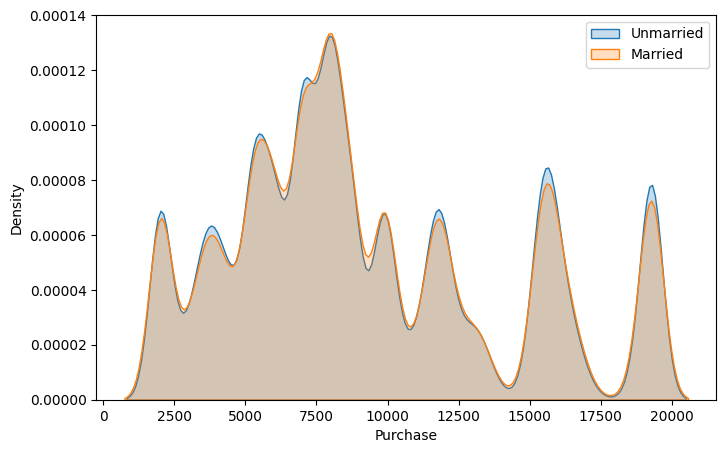

In [ ]:
unmarried = df1[df1['Marital_Status'] == 0]['Purchase']
married = df1[df1['Marital_Status'] == 1]['Purchase']
plt.figure(figsize=(8,5))
sns.kdeplot(unmarried, label='Unmarried', shade=True)
sns.kdeplot(married, label='Married', shade=True)
plt.legend()

------------------------------------------------------------------------------------------------

Business Insight for Walmart

Conclusion:

Marital status does not significantly affect the average spending behavior of Walmart customers.

Implications:

Walmart should not segment promotions or campaigns purely based on marital status.

Focus marketing strategies on other stronger predictors, such as:

Gender differences (as seen earlier)

Age groups

City categories (A/B/C)
Product categories or purchase frequency

Example actionable steps:

Use age-based or gender-based personalization for offers.

Combine purchase history with demographics for targeted campaigns.

Allocate marketing budget to segments that show statistically distinct spending patterns.

Results when the same activity is performed for Age

In [ ]:
mean_18_25=df1[df1["Age"]=="18-25"]["Purchase"].mean()
std_18_25=df1[df1["Age"]=="18-25"]["Purchase"].std()
n_18_25 = len(df1[df1["Age"]=="18-25"]["Purchase"])
mean_26_35=df1[df1["Age"]=="26-35"]["Purchase"].mean()
std_26_35=df1[df1["Age"]=="26-35"]["Purchase"].std()
n_26_35 = len(df1[df1["Age"]=="26-35"]["Purchase"])
mean_36_45=df1[df1["Age"]=="36-45"]["Purchase"].mean()
std_36_45=df1[df1["Age"]=="36-45"]["Purchase"].std()
n_36_45 = len(df1[df1["Age"]=="36-45"]["Purchase"])
print("Confidence intervals of the mean of the expenses by 18 to 25 aged person",norm.interval(0.95,loc=mean_18_25,scale=std_18_25/np.sqrt(n)))
print("Confidence intervals of the mean of the expenses by 26 to 35 aged person",norm.interval(0.95,loc=mean_26_35,scale=std_26_35/np.sqrt(n)))
print("Confidence intervals of the mean of the expenses by 36 to 45 aged person",norm.interval(0.95,loc=mean_36_45,scale=std_36_45/np.sqrt(n)))

Confidence intervals of the mean of the expenses by 18 to 25 aged person (np.float64(9152.194132772242), np.float64(9185.827821873554))
Confidence intervals of the mean of the expenses by 26 to 35 aged person (np.float64(9227.081035795944), np.float64(9260.479202287368))
Confidence intervals of the mean of the expenses by 36 to 45 aged person (np.float64(9306.248945725512), np.float64(9339.594872732307))


No Overlap between intervals — each age group’s confidence interval lies completely above the previous one.

18–25: ends at ~9186

26–35: starts at ~9227

36–45: starts at ~9306

 This means the differences in mean purchases between these age groups are statistically significant.

Trend:
As age increases, average spending also increases.

Young customers (18–25) are relatively low spenders — possibly students or early professionals.

Mid-age customers (26–35) show higher spending — likely stable income and family purchases.

Customers aged 36–45 are the highest spenders, possibly due to established careers and household needs.


/tmp/ipython-input-3819418767.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(age_18_25, label='18-25', shade=True)
/tmp/ipython-input-3819418767.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(age_26_35, label='26-35', shade=True)
/tmp/ipython-input-3819418767.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(age_36_45, label='36-45', shade=True)


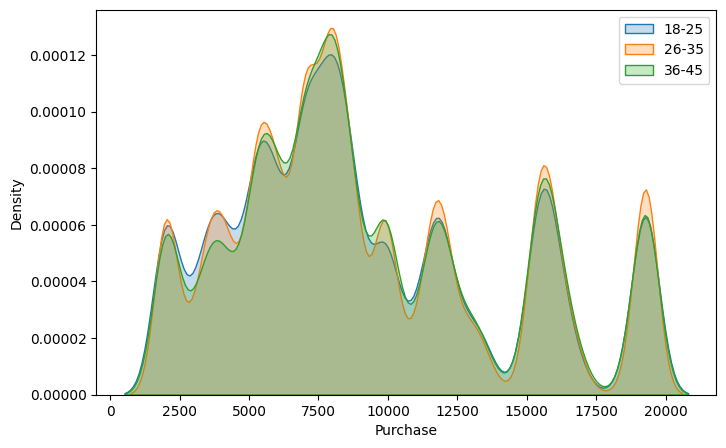

In [ ]:
age_18_25 = df1[df1['Age'] == "18-25"]['Purchase']
age_26_35 = df1[df1['Age'] == "26-35"]['Purchase']
age_36_45 = df1[df1['Age'] == "36-45"]['Purchase']
plt.figure(figsize=(8,5))
sns.kdeplot(age_18_25, label='18-25', shade=True)
sns.kdeplot(age_26_35, label='26-35', shade=True)
sns.kdeplot(age_36_45, label='36-45', shade=True)
plt.legend()

Final Insights and Recommendations :

Business Insight for Walmart

The KDE distribution and 95% confidence intervals both show that average purchase amounts rise consistently with age.
Customers aged 18–25 spend significantly less than those aged 26–35 and 36–45, whose spending increases progressively.
This trend is statistically significant (non-overlapping CIs), indicating age is a strong predictor of spending behavior.
Walmart should leverage this by designing age-targeted promotions and personalized product bundles to maximize revenue.

------------------------------------------------------------------------------------------------


In [ ]:
def bootstrap_ci(data, n_bootstrap=1000, ci=95):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (100-ci)/2)
    upper = np.percentile(means, 100-(100-ci)/2)
    return (lower, upper)

# Compute CI using the full dataset
for gender in df1["Gender"].unique():
    data = df1[df1["Gender"] == gender]["Purchase"].values
    ci = bootstrap_ci(data)
    print(f"Gender {gender}: 95% CI of population= {ci}")

Gender F: 95% CI of population= (np.float64(8712.478525355464), np.float64(8760.35549098366))
Gender M: 95% CI of population= (np.float64(9412.365990419037), np.float64(9441.691558240134))


In [ ]:
def bootstrap_ci(data, n_bootstrap=1000, ci=95):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=3000, replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (100-ci)/2)
    upper = np.percentile(means, 100-(100-ci)/2)
    return (lower, upper)

# Compute CI using the full dataset
for gender in df1["Gender"].unique():
    data = df1[df1["Gender"] == gender]["Purchase"].values
    ci = bootstrap_ci(data)
    print(f"Gender {gender}: 95% CI with sample size 3000 = {ci}")
def bootstrap_ci(data, n_bootstrap=1000, ci=95):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=30000, replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (100-ci)/2)
    upper = np.percentile(means, 100-(100-ci)/2)
    return (lower, upper)

# Compute CI using the full dataset
for gender in df1["Gender"].unique():
    data = df1[df1["Gender"] == gender]["Purchase"].values
    ci = bootstrap_ci(data)
    print(f"Gender {gender}: 95% CI with sample size 30000 = {ci}")

Gender F: 95% CI with sample size 3000 = (np.float64(8581.860283333333), np.float64(8913.472575))
Gender M: 95% CI with sample size 3000 = (np.float64(9263.525500000002), np.float64(9598.074941666666))
Gender F: 95% CI with sample size 30000 = (np.float64(8685.57437), np.float64(8786.019065))
Gender M: 95% CI with sample size 30000 = (np.float64(9372.3278025), np.float64(9478.945398333333))


1) Is the CI from the entire dataset wider for one gender? Why?

Yes.

The male CI from the entire dataset is narrower (29.33) than the female CI (47.88).
smaller sample standard deviation s for males, or
larger effective sample size n for males, or both.
Without the raw n and s by gender I can't say which exactly, but one (or both) of those factors produced a smaller standard error for males, hence a narrower CI.

2) How is the width of the confidence interval affected by sample size?

Strong inverse relationship.
Conclusion: larger samples → smaller CI width (more precise estimate of the population mean).

3) Do the confidence intervals for different sample sizes overlap?

Yes — and importantly, they are consistent.

For Females:

3k CI (8581.86, 8913.47)

30k CI (8685.57, 8786.02)

Entire CI (8712.48, 8760.36)
The 30k and entire-dataset CIs lie inside the broader 3k CI and overlap each other strongly.

For Males:

3k CI (9263.53, 9598.07)

30k CI (9372.33, 9478.95)

Entire CI (9412.37, 9441.69)
Again, the narrower CIs (30k, entire) sit inside the wide 3k CI.

Implication: estimates are stable across sample sizes — as sample size grows the CI shrinks and converges toward the full-data estimate.

Also note an important cross-group point: female and male CIs do not overlap at any sample size (even with n=3k), so the gender difference is robust.

4) How does sample size affect the shape of the distributions of the means?

By the Central Limit Theorem (CLT):

The sampling distribution of the sample mean becomes approximately normal as sample size increases (even if the original data are skewed).
So with larger n: The distribution of sample means becomes narrower (means concentrate closer to the true population mean).

That is why CI width shrinks and the estimate becomes more precise.

Empirically: going from 3k → 30k made the CI much narrower and would produce a sampling-means distribution that is much more tightly peaked.



------------------------------------------------------------------------------------------------


In [ ]:
def bootstrap_ci(data, n_bootstrap=1000, ci=95):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (100-ci)/2)
    upper = np.percentile(means, 100-(100-ci)/2)
    return (lower, upper)

# Compute CI using the full dataset
for MS in df1["Marital_Status"].unique():
    data = df1[df1["Marital_Status"] == MS]["Purchase"].values
    ci = bootstrap_ci(data)
    print(f"Marital Status {MS}: 95% CI of population= {ci}")
def bootstrap_ci(data, n_bootstrap=1000, ci=95):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=3000, replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (100-ci)/2)
    upper = np.percentile(means, 100-(100-ci)/2)
    return (lower, upper)

# Compute CI using the full dataset
for MS in df1["Marital_Status"].unique():
    data = df1[df1["Marital_Status"] == MS]["Purchase"].values
    ci = bootstrap_ci(data)
    print(f"Marital Status {MS}: 95% CI with sample size 3000 = {ci}")
def bootstrap_ci(data, n_bootstrap=1000, ci=95):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=30000, replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (100-ci)/2)
    upper = np.percentile(means, 100-(100-ci)/2)
    return (lower, upper)

# Compute CI using the full dataset
for MS in df1["Marital_Status"].unique():
    data = df1[df1["Marital_Status"] == MS]["Purchase"].values
    ci = bootstrap_ci(data)
    print(f"Marital Status {MS}: 95% CI with sample size 30000 = {ci}")

Marital Status 0: 95% CI of population= (np.float64(9241.57292559072), np.float64(9274.571072749444))
Marital Status 1: 95% CI of population= (np.float64(9234.096646023512), np.float64(9274.236226518504))
Marital Status 0: 95% CI with sample size 3000 = (np.float64(9085.162725), np.float64(9417.57375))
Marital Status 1: 95% CI with sample size 3000 = (np.float64(9080.327858333334), np.float64(9427.070625))
Marital Status 0: 95% CI with sample size 30000 = (np.float64(9206.353915), np.float64(9316.535925833334))
Marital Status 1: 95% CI with sample size 30000 = (np.float64(9196.4673025), np.float64(9310.650540833334))


i. Is the CI from the entire dataset wider for one marital group? Why?

Yes, the CI for Married (1) customers (width ≈ 40.1) is slightly wider than that for Unmarried (0) (width ≈ 33.0).
The difference arises if:

Married customers have higher purchase variability (larger standard deviation), or Slightly smaller effective sample size than unmarried customers.
Either factor increases the standard error and hence the CI width.

ii. How is the width of the CI affected by sample size?

As sample size increases, CI width decreases.

Example:

n= 3,000 → widths ≈ 330–345
n=30,000 → widths ≈ 110
Full dataset → widths ≈ 33–40
Larger samples → smaller standard error → narrower CI → more precise mean estimate.

iii. Do the CIs for different sample sizes overlap?

Yes, completely — and they are consistent.

For both Married and Unmarried groups:

The 3,000-sample CIs are very wide, encompassing the smaller-sample CIs.

The 30,000-sample and full-dataset intervals are entirely nested within the 3,000-sample range.

This nesting shows the sample means are stable, just the uncertainty shrinks as n increases.

Also note:
Both groups’ CIs (even full-data) overlap each other substantially — meaning no statistically significant difference between Married and Unmarried mean spending.

iv. How does sample size affect the shape of the distribution of means?

According to the Central Limit Theorem (CLT):

As sample size grows:
The distribution of sample means becomes more normal (even if raw data are not perfectly normal).

This means that:
Small samples → wider, flatter sampling distribution of means

Large samples → tighter, more peaked (concentrated) around the true population mean

In this case, the transition from 3,000 → 30,000 → full dataset shows how the distribution of mean spending narrows and stabilizes, confirming CLT behavior.

------------------------------------------------------------------------------------------------

In [ ]:
def bootstrap_ci(data, n_bootstrap=1000, ci=95):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (100-ci)/2)
    upper = np.percentile(means, 100-(100-ci)/2)
    return (lower, upper)

# Compute CI using the full dataset
for MS in ["18-25","26-35","36-45"]:
    data = df1[df1["Age"] == MS]["Purchase"].values
    ci = bootstrap_ci(data)
    print(f"Age {MS}: 95% CI of population= {ci}")
def bootstrap_ci(data, n_bootstrap=1000, ci=95):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=3000, replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (100-ci)/2)
    upper = np.percentile(means, 100-(100-ci)/2)
    return (lower, upper)

# Compute CI using the full dataset
for MS in ["18-25","26-35","36-45"]:
    data = df1[df1["Age"] == MS]["Purchase"].values
    ci = bootstrap_ci(data)
    print(f"Age {MS}: 95% CI with sample size 3000 = {ci}")
def bootstrap_ci(data, n_bootstrap=1000, ci=95):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=30000, replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (100-ci)/2)
    upper = np.percentile(means, 100-(100-ci)/2)
    return (lower, upper)

# Compute CI using the full dataset
for MS in ["18-25","26-35","36-45"]:
    data = df1[df1["Age"] == MS]["Purchase"].values
    ci = bootstrap_ci(data)
    print(f"Age {MS}: 95% CI with sample size 30000 = {ci}")

Age 18-25: 95% CI of population= (np.float64(9137.59161172988), np.float64(9199.453627082079))
Age 26-35: 95% CI of population= (np.float64(9222.870035794469), np.float64(9263.612774549496))
Age 36-45: 95% CI of population= (np.float64(9292.972169425431), np.float64(9351.579048157944))
Age 18-25: 95% CI with sample size 3000 = (np.float64(9003.868925), np.float64(9357.389041666665))
Age 26-35: 95% CI with sample size 3000 = (np.float64(9057.660583333334), np.float64(9403.585425))
Age 36-45: 95% CI with sample size 3000 = (np.float64(9153.428608333332), np.float64(9507.775441666667))
Age 18-25: 95% CI with sample size 30000 = (np.float64(9113.347635833334), np.float64(9224.782108333333))
Age 26-35: 95% CI with sample size 30000 = (np.float64(9190.182049166666), np.float64(9302.625920833332))
Age 36-45: 95% CI with sample size 30000 = (np.float64(9268.730486666667), np.float64(9379.571930833332))


i. Is the CI computed using the entire dataset wider for one of the ages? Why?

Yes.
CI width for entire population:

Age 18–25: 9199.45 − 9137.59 ≈ 61.86

Age 26–35: 9263.61 − 9222.87 ≈ 40.74

Age 36–45: 9351.58 − 9292.97 ≈ 58.61

Observation: Age 18–25 has the widest CI, and age 26–35 has the narrowest.

Reason: The width of a CI depends on the standard deviation of the population. A wider CI indicates higher variability in the data for that age group. So Age 18–25 likely has more spread in its data compared to 26–35.

ii. How is the width of the confidence interval affected by sample size?

CI width decreases as sample size increases.

Compare n=3000 vs n=30000:

For Age 18–25:

n=3000: 9357.39 − 9003.87 ≈ 353.52

n=30000: 9224.78 − 9113.35 ≈ 111.43
As n increases, SE decreases → CI becomes narrower.

iii. Do the confidence intervals for different sample sizes overlap?

Yes, they do overlap, but the extent of overlap decreases as sample size increases.

Example for Age 18–25:

Population CI: (9137.59, 9199.45)

Sample n=3000: (9003.87, 9357.39) → overlaps completely

Sample n=30000: (9113.35, 9224.78) → still overlaps, but narrower

Conclusion: Larger samples give more precise estimates, but smaller sample CIs still capture the population CI, especially for sufficiently large n.

iv. How does the sample size affect the shape of the distribution of the means?

As sample size increases: The distribution of sample means becomes more concentrated around the population mean.

According to the Central Limit Theorem, the sample means will tend to form a normal distribution, regardless of the population distribution, if n is large enough.

Smaller sample sizes → wider spread of sample means; larger sample sizes → narrower spread.

Observation from your CIs: The CI with n=30000 is much narrower than n=3000, showing a tighter distribution of sample means.

------------------------------------------------------------------------------------------------

## Conclusion
The analysis of customer purchase data reveals that customer spending behavior is significantly affected by Gender and Age, but not by Marital Status.

Gender and Age are statistically significant predictors of average purchase amount, as demonstrated by the non-overlapping 95% confidence intervals for their mean purchases.

Males spend significantly more on average per transaction (mean ≈9427) than females (mean ≈8736).

Average purchase amount increases with age across the 18–25, 26–35, and 36–45 age groups.

Marital Status has no statistically significant effect on average spending, as the 95% confidence intervals for married and unmarried customers overlap heavily.
The top-selling products are categories 1, 5, and 8, and the most frequent customers are in the 26-35 age group and reside in City Category C

## Final Recommendations for Walmart
Walmart should develop targeted marketing strategies that prioritize the statistically significant demographic variables—Gender and Age—to maximize revenue and optimize marketing spend.

1. Gender-Specific Strategies 🚻
The significant difference in average spending per transaction requires distinct strategies for male and female customers.

Targeting Male Customers (Higher-Value Purchases):


Focus on Upselling: Promote premium products, high-ticket items, and tech-related goods (like those in top-selling product categories 1, 5, and 8) since males tend to make fewer but higher-value purchases.


Personalized Ads: Use marketing channels frequented by the male demographic to advertise new product releases or bundled high-value items.

Inventory Focus: Ensure stock availability for high-demand, high-cost items that males are more likely to buy.

Targeting Female Customers (Lower-Value, Frequent Purchases):

Increase Cart Value: Implement strategies like combo deals, "buy X get Y% off," and personalized coupons based on past purchases to increase the value of their frequent, smaller transactions.

Loyalty Programs: Use loyalty programs to incentivize cross-category spending among females.

Focus on Essentials: Promote everyday essentials and discounted bulk-buy options, matching their tendency for more frequent shopping.

2. Age-Targeted Campaigns 📈
Since average spending is positively correlated with age, promotions should be structured to encourage higher purchases across all groups.

Mid-Age/High Spenders (26–45):This is the core spending group with a progressively increasing average purchase amount.
Market products likely tied to family needs, home improvement, and stable income, as they are likely stable professionals or family purchasers.
Promote high-end versions of popular products (categories 1, 5, 8).
Younger Customers (18–25): These are relatively low spenders.

Focus on value, student discounts, entry-level products, and trendy items to build brand loyalty early.

3. Allocation and Efficiency 💡

Avoid Marital Status Segmentation: Do not segment marketing or promotions purely based on marital status, as the analysis shows no statistical difference in average spending behavior between married and unmarried customers.


Focus Budget: Allocate marketing budget to segments that show statistically distinct spending patterns, such as Gender, Age, City Category, and Product Category, to ensure higher return on investment (ROI).



City Category C Focus: Given that most customers are from City Category C (53% of customers), tailor promotions, store layout, and inventory in City C locations to maximize the impact on this dominant customer base. The observation that City C males are leading in purchasing suggests a high-potential segment